## Import Files

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import ast 
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from datetime import datetime
import datetime
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle
import warnings; warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
pip install fuzzywuzzy

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
links=pd.read_csv('/content/drive/MyDrive/MOVIE RECOMMENDATION SYSTEM/ml-latest-small/ml-latest-small/links.csv')
movies=pd.read_csv('/content/drive/MyDrive/MOVIE RECOMMENDATION SYSTEM/ml-latest-small/ml-latest-small/movies.csv')
ratings=pd.read_csv('/content/drive/MyDrive/MOVIE RECOMMENDATION SYSTEM/ml-latest-small/ml-latest-small/ratings.csv')
tags2=pd.read_csv('/content/drive/MyDrive/MOVIE RECOMMENDATION SYSTEM/ml-latest-small/ml-latest-small/tags2.csv')
md=pd.read_csv('/content/drive/MyDrive/MOVIE RECOMMENDATION SYSTEM/ml-latest-small/ml-latest-small/movies_metadata.csv')
keywords=pd.read_csv('/content/drive/MyDrive/MOVIE RECOMMENDATION SYSTEM/ml-latest-small/ml-latest-small/keywords.csv')

In [ ]:
links=pd.read_csv('/content/drive/MyDrive/ml-latest-small/links.csv')
movies=pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv')
ratings=pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv')
tags2=pd.read_csv('/content/drive/MyDrive/ml-latest-small/tags2.csv')

In [ ]:
movies=pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv', usecols=['movieId','title','genres'], dtype={'movieId':'int32','title':'str','genres':'str'})
ratings=pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv')

In [ ]:
content = pd.merge(movies,ratings[['userId','movieId','rating', 'timestamp']],on='movieId', how='right')
content

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,160341,Bloodmoon (1997),Action|Thriller,610,2.5,1479545749
100832,160527,Sympathy for the Underdog (1971),Action|Crime|Drama,610,4.5,1479544998
100833,160836,Hazard (2005),Action|Drama|Thriller,610,3.0,1493844794
100834,163937,Blair Witch (2016),Horror|Thriller,610,3.5,1493848789


# Movie Recommendation System

In [ ]:
movies_users=content.pivot(index='movieId', columns='userId',values='rating').fillna(0)
mat_movies_users=csr_matrix(movies_users.values)

In [ ]:
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20,leaf_size=5)

In [ ]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', leaf_size=5, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
def recommender(movie_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, content['title'])[2]
    print('Movie Selected: ',content['title'][idx], 'Index:',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(content['title'][i].where(i!=idx))
recommender('international', mat_movies_users, model_knn,10)

Movie Selected:  Austin Powers: International Man of Mystery (1997) Index: 9457
Searching for recommendations.....
9401                           Grosse Pointe Blank (1997)
9394                                 McHale's Navy (1997)
9459    Austin Powers: International Man of Mystery (1...
9457                                                  NaN
9440                           Grosse Pointe Blank (1997)
9431                           Grosse Pointe Blank (1997)
9667                                      Face/Off (1997)
9403                           Grosse Pointe Blank (1997)
9402                           Grosse Pointe Blank (1997)
9472    Austin Powers: International Man of Mystery (1...
Name: title, dtype: object


# Graph

In [ ]:
content

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,160341,Bloodmoon (1997),Action|Thriller,610,2.5,1479545749
100832,160527,Sympathy for the Underdog (1971),Action|Crime|Drama,610,4.5,1479544998
100833,160836,Hazard (2005),Action|Drama|Thriller,610,3.0,1493844794
100834,163937,Blair Witch (2016),Horror|Thriller,610,3.5,1493848789


In [ ]:
content.isnull()

,movieId,title,genres,userId,rating,timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
100831,False,False,False,False,False,False
100832,False,False,False,False,False,False
100833,False,False,False,False,False,False
100834,False,False,False,False,False,False


Text(0.5, 1.0, 'Graph')

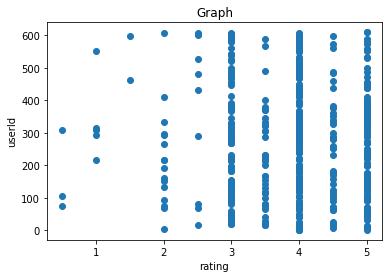

In [ ]:
plt.scatter(content.head(500)['rating'],content.head(500)['userId'])
plt.xlabel('rating')
plt.ylabel('userId')
plt.title('Graph')

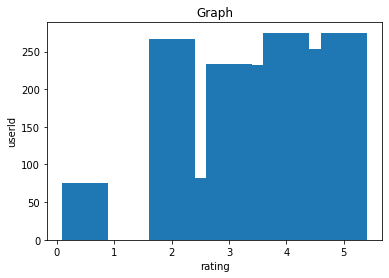

In [ ]:
plt.bar(content.head(100)['rating'],content.head(100)['userId'])
plt.xlabel('rating')
plt.ylabel("userId")
plt.title('Graph')
plt.show()

# Prediction

In [ ]:
content


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,160341,Bloodmoon (1997),Action|Thriller,610,2.5,1479545749
100832,160527,Sympathy for the Underdog (1971),Action|Crime|Drama,610,4.5,1479544998
100833,160836,Hazard (2005),Action|Drama|Thriller,610,3.0,1493844794
100834,163937,Blair Witch (2016),Horror|Thriller,610,3.5,1493848789


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,confusion_matrix

In [ ]:
merge = pd.DataFrame(content,columns=['movieId','userId','rating'])


Splitting of data

In [ ]:
merge_X_train = merge[ : -20]
merge_X_test = merge[-20:]
merge_Y_train = merge.rating[ : -20]
merge_Y_test = merge.rating[-20:]


Regression Model

In [ ]:
Result = linear_model.LinearRegression()
Result.fit(merge_X_train,merge_Y_train)
merge_Y_pred = Result.predict(merge_X_test)
print(Result.score(merge_X_test, merge_Y_test))

1.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor 
Result = DecisionTreeRegressor(random_state = 0) 
Result.fit(merge_X_train, merge_Y_train)
print(Result.score(merge_X_test, merge_Y_test))

1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
Result = RandomForestRegressor(n_estimators = 100, random_state = 0)
Result.fit(merge_X_train, merge_Y_train)
print(Result.score(merge_X_test, merge_Y_test))

1.0


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report
Predictions = Result.predict(merge_X_test)
print("\n Mean Squared Error is found to be {:.2f}".format(mean_squared_error(merge_Y_test,Predictions)))
print("\n Mean Absolute Error is found to be {:.2f}".format(mean_absolute_error(merge_Y_test,Predictions)))
print("\n Root Mean Squared Error is found to be {:.2f}".format(np.sqrt(metrics.mean_squared_error(merge_Y_test,Predictions))))
print("\n R2 Score of the Model is found to be {:.2f}".format(r2_score(merge_Y_test,Predictions)))



 Mean Squared Error is found to be 0.00

 Mean Absolute Error is found to be 0.00

 Root Mean Squared Error is found to be 0.00

 R2 Score of the Model is found to be 1.00


In [ ]:
print(merge_Y_test)
print("predicted values are")
print(merge_Y_pred)

100816    3.0
100817    3.0
100818    4.0
100819    4.0
100820    3.5
100821    3.0
100822    4.0
100823    0.5
100824    4.0
100825    4.0
100826    3.0
100827    3.5
100828    3.5
100829    3.5
100830    3.5
100831    2.5
100832    4.5
100833    3.0
100834    3.5
100835    3.5
Name: rating, dtype: float64
predicted values are
[3.  3.  4.  4.  3.5 3.  4.  0.5 4.  4.  3.  3.5 3.5 3.5 3.5 2.5 4.5 3.
 3.5 3.5]


# Extra Feature - Recommend by Emotion

In [ ]:
movies=pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
df_movies=pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv')
df_ratings=pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv')

In [ ]:
column_spl=df_movies.genres.str.split('|', 5, expand=True)

In [ ]:
column_spl

,0,1,2,3,4,5
0,Adventure,Animation,Children,Comedy,Fantasy,None
1,Adventure,Children,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,Romance,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
9737,Action,Animation,Comedy,Fantasy,None,None
9738,Animation,Comedy,Fantasy,None,None,None
9739,Drama,None,None,None,None,None
9740,Action,Animation,None,None,None,None


In [ ]:
df_drmovies=pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv')

In [ ]:
df_drmovies.drop(['genres'], axis = 1)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017)
9738,193583,No Game No Life: Zero (2017)
9739,193585,Flint (2017)
9740,193587,Bungo Stray Dogs: Dead Apple (2018)


In [ ]:
result = pd.concat([df_drmovies, column_spl], axis=1, join='inner')

In [ ]:
result

,movieId,title,genres,0,1,2,3,4,5
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy,None
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure,Children,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy,Drama,Romance,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Action,Animation,Comedy,Fantasy,None,None
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,Animation,Comedy,Fantasy,None,None,None
9739,193585,Flint (2017),Drama,Drama,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Action,Animation,None,None,None,None


In [ ]:
emotioncol=result.drop(['genres'], axis = 1)

In [ ]:
emotioncol

,movieId,title,0,1,2,3,4,5
0,1,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None
1,2,Jumanji (1995),Adventure,Children,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy,Drama,Romance,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action,Animation,Comedy,Fantasy,None,None
9738,193583,No Game No Life: Zero (2017),Animation,Comedy,Fantasy,None,None,None
9739,193585,Flint (2017),Drama,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,Animation,None,None,None,None


In [ ]:
emotioncol.rename(columns = {0:'A', 1:'B',2:'C',3:'D',4:'E',5:'F'}, inplace = True)
emotioncol

,movieId,title,A,B,C,D,E,F
0,1,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None
1,2,Jumanji (1995),Adventure,Children,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy,Drama,Romance,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action,Animation,Comedy,Fantasy,None,None
9738,193583,No Game No Life: Zero (2017),Animation,Comedy,Fantasy,None,None,None
9739,193585,Flint (2017),Drama,None,None,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,Animation,None,None,None,None


In [ ]:
emotioncol.drop(['E','F'], axis = 1)

,movieId,title,A,B,C,D
0,1,Toy Story (1995),Adventure,Animation,Children,Comedy
1,2,Jumanji (1995),Adventure,Children,Fantasy,None
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None
3,4,Waiting to Exhale (1995),Comedy,Drama,Romance,None
4,5,Father of the Bride Part II (1995),Comedy,None,None,None
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action,Animation,Comedy,Fantasy
9738,193583,No Game No Life: Zero (2017),Animation,Comedy,Fantasy,None
9739,193585,Flint (2017),Drama,None,None,None
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,Animation,None,None


In [ ]:
emotioncol['Emotion'] = ''
emotioncol

,movieId,title,A,B,C,D,E,F,Emotion
0,1,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,
1,2,Jumanji (1995),Adventure,Children,Fantasy,None,None,None,
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None,
3,4,Waiting to Exhale (1995),Comedy,Drama,Romance,None,None,None,
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None,
...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action,Animation,Comedy,Fantasy,None,None,
9738,193583,No Game No Life: Zero (2017),Animation,Comedy,Fantasy,None,None,None,
9739,193585,Flint (2017),Drama,None,None,None,None,None,
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,Animation,None,None,None,None,


In [ ]:
emotioncol ['Emotion'] = np.where((emotioncol['A']=='Adventure') ,'Excited',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Animation') ,'Joyous',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Action') ,'Angry',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Comedy') ,'Funny',emotioncol['Emotion'])

emotioncol['Emotion'] = np.where((emotioncol['A']=='Drama') ,'Sad',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Romance') ,'Love',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Crime') ,'Suspense',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Children') ,'Happy',emotioncol['Emotion'])

emotioncol['Emotion'] = np.where((emotioncol['A']=='Fantasy') ,'Satisfied',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Thriller') ,'Anticipation',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Horror') ,'Fear',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Mystery') ,'Anticipation',emotioncol['Emotion'])

emotioncol['Emotion'] = np.where((emotioncol['A']=='Sci-Fi') ,'Amazed',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Musical') ,'Melodious',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='War') ,'Angry',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Documentary') ,'Excited',emotioncol['Emotion'])

emotioncol['Emotion'] = np.where((emotioncol['A']=='Western') ,'Determinative',emotioncol['Emotion'])
emotioncol['Emotion'] = np.where((emotioncol['A']=='Film-Noir') ,'Fear',emotioncol['Emotion'])



In [ ]:
emotioncol

,movieId,title,A,B,C,D,E,F,Emotion
0,1,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,Excited
1,2,Jumanji (1995),Adventure,Children,Fantasy,None,None,None,Excited
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None,Funny
3,4,Waiting to Exhale (1995),Comedy,Drama,Romance,None,None,None,Funny
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None,Funny
...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action,Animation,Comedy,Fantasy,None,None,Angry
9738,193583,No Game No Life: Zero (2017),Animation,Comedy,Fantasy,None,None,None,Joyous
9739,193585,Flint (2017),Drama,None,None,None,None,None,Sad
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,Animation,None,None,None,None,Angry


In [ ]:
movies_users=df_ratings.pivot(index='movieId', columns='userId',values='rating').fillna(0)
mat_movies_users=csr_matrix(movies_users.values)

In [ ]:
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)

In [ ]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
def recommender(movie_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, emotioncol['Emotion'])[2]
    print('Emotion Selected: ',emotioncol['Emotion'][idx], 'Index: ',idx)
    print('Movie Selected: ',emotioncol['title'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(emotioncol['title'][i].where(i!=idx))
        print(emotioncol['Emotion'][i].where(i!=idx))
emotion=input("Search movie by Emotion - ")    
recommender(emotion, mat_movies_users, model_knn,15)

Search movie by Emotion - angry
Emotion Selected:  Angry Index:  5
Movie Selected:  Heat (1995) Index:  5
Searching for recommendations.....
5                                                    NaN
592                                     Rock, The (1996)
31             Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
254    Léon: The Professional (a.k.a. The Professiona...
15                                         Casino (1995)
520                                         Fargo (1996)
398                                 Fugitive, The (1993)
43                           Seven (a.k.a. Se7en) (1995)
84                                   Broken Arrow (1996)
136                                     Desperado (1995)
615                 Independence Day (a.k.a. ID4) (1996)
97                                     Braveheart (1995)
46                            Usual Suspects, The (1995)
546                           Mission: Impossible (1996)
99            Rumble in the Bronx (Hont faan kui) (1995)
Name

# Extra Feature - Recommend by Year


In [ ]:
year_spl=df_movies.title.str.split('(', 1, expand=True)

In [ ]:
year_spl.rename(columns = {'title':'titles', 1:'X'}, inplace = True)
year_spl

,0,X
0,Toy Story,1995)
1,Jumanji,1995)
2,Grumpier Old Men,1995)
3,Waiting to Exhale,1995)
4,Father of the Bride Part II,1995)
...,...,...
9737,Black Butler: Book of the Atlantic,2017)
9738,No Game No Life: Zero,2017)
9739,Flint,2017)
9740,Bungo Stray Dogs: Dead Apple,2018)


In [ ]:
year_spl1=year_spl.X.str.split(')', 1, expand=True)

In [ ]:
year_spl1.rename(columns = {0:'year', 1:'X'}, inplace = True)
year_spl1

,year,X
0,1995,
1,1995,
2,1995,
3,1995,
4,1995,
...,...,...
9737,2017,
9738,2017,
9739,2017,
9740,2018,


In [ ]:
year_spl1['Movie_Year'] = ''
year_spl1

,year,X,Movie_Year
0,1995,,
1,1995,,
2,1995,,
3,1995,,
4,1995,,
...,...,...,...
9737,2017,,
9738,2017,,
9739,2017,,
9740,2018,,


In [ ]:
year_spl1=year_spl1.drop(['X'], axis = 1)

In [ ]:
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1916') ,'1916',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1924') ,'1924',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1929') ,'1929',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1931') ,'1931',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1933') ,'1933',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1935') ,'1935',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1936') ,'1936',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1938') ,'1938',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1945') ,'1945',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1948') ,'1948',year_spl1['Movie_Year'])



year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1951') ,'1951',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1954') ,'1954',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1955') ,'1955',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1956') ,'1956',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1957') ,'1957',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1958') ,'1958',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1959') ,'1959',year_spl1['Movie_Year'])



year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1960') ,'1960',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1961') ,'1961',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1962') ,'1962',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1964') ,'1964',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1965') ,'1965',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1966') ,'1966',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1967') ,'1967',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1968') ,'1968',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1969') ,'1969',year_spl1['Movie_Year'])




year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1971') ,'1971',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1972') ,'1972',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1973') ,'1973',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1974') ,'1974',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1975') ,'1975',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1976') ,'1976',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1977') ,'1977',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1979') ,'1979',year_spl1['Movie_Year'])



year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1980') ,'1980',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1981') ,'1981',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1982') ,'1982',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1983') ,'1983',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1984') ,'1984',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1985') ,'1985',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1986') ,'1986',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1987') ,'1987',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1988') ,'1988',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1989') ,'1989',year_spl1['Movie_Year'])



year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1990') ,'1976',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1991') ,'1991',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1992') ,'1991',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1993') ,'1995',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1994') ,'1996',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1995') ,'1995',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1996') ,'1996',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1997') ,'1997',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1998') ,'1998',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='1999') ,'1999',year_spl1['Movie_Year'])


year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2000') ,'2000',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2001') ,'2001',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2002') ,'2002',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2003') ,'2003',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2004') ,'2004',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2005') ,'2005',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2006') ,'2006',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2007') ,'2007',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2008') ,'2008',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2009') ,'2009',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2010') ,'2010',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2011') ,'2011',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2012') ,'2012',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2013') ,'2013',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2014') ,'2014',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2015') ,'2015',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2016') ,'2016',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2017') ,'2017',year_spl1['Movie_Year'])
year_spl1['Movie_Year'] = np.where((year_spl1['year']=='2018') ,'2018',year_spl1['Movie_Year'])
year_spl1

,year,Movie_Year
0,1995,1995
1,1995,1995
2,1995,1995
3,1995,1995
4,1995,1995
...,...,...
9737,2017,2017
9738,2017,2017
9739,2017,2017
9740,2018,2018


In [ ]:
result1 = pd.concat([year_spl1,movies], axis=1, join='inner')
result1

,year,Movie_Year,movieId,title,genres
0,1995,1995,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1995,1995,2,Jumanji (1995),Adventure|Children|Fantasy
2,1995,1995,3,Grumpier Old Men (1995),Comedy|Romance
3,1995,1995,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1995,1995,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
9737,2017,2017,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,2017,2017,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,2017,2017,193585,Flint (2017),Drama
9740,2018,2018,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
feature2_year=result1.drop(['year'], axis = 1)
feature2_year

,Movie_Year,movieId,title,genres
0,1995,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1995,2,Jumanji (1995),Adventure|Children|Fantasy
2,1995,3,Grumpier Old Men (1995),Comedy|Romance
3,1995,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1995,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
9737,2017,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,2017,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,2017,193585,Flint (2017),Drama
9740,2018,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
year_rating=pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv', usecols=['userId','rating'], dtype={'userId':'int32','rating':'float64'})

In [ ]:
year_rating

,userId,rating
0,1,4.0
1,1,4.0
2,1,4.0
3,1,5.0
4,1,5.0
...,...,...
100831,610,4.0
100832,610,5.0
100833,610,5.0
100834,610,5.0


In [ ]:
result2 = pd.concat([feature2_year,year_rating], axis=1, join='inner')
result2

,Movie_Year,movieId,title,genres,userId,rating
0,1995,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1995,2,Jumanji (1995),Adventure|Children|Fantasy,1,4.0
2,1995,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0
3,1995,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,5.0
4,1995,5,Father of the Bride Part II (1995),Comedy,1,5.0
...,...,...,...,...,...,...
9737,2017,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,64,4.0
9738,2017,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,64,3.0
9739,2017,193585,Flint (2017),Drama,64,4.5
9740,2018,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,64,3.0


In [ ]:
movies_users=result2.pivot(index='movieId', columns='userId',values='rating').fillna(0)
mat_movies_users=csr_matrix(movies_users.values)

In [ ]:
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)

In [ ]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
def recommender(year, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(year, result2['Movie_Year'])[2]
    print('Movie Selected: ',result2['title'][idx], 'Index: ',idx)
    print('Year Selected: ',result2['Movie_Year'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(result2['title'][i].where(i!=idx))
year_search=input("Search movie by its year - ")        
recommender(year_search, mat_movies_users, model_knn,10)

Search movie by its year - 2017
Movie Selected:  Pirates of the Caribbean: Dead Men Tell No Tales (2017) Index:  8687
Year Selected:  2017 Index:  8687
Searching for recommendations.....
8691                           Deadpool (2016)
8692                      Black Panther (2017)
8688                     Justice League (2017)
8689                            Ant-Man (2015)
8690                     Fantastic Four (2015)
8686            Avengers: Age of Ultron (2015)
8695          Guardians of the Galaxy 2 (2017)
8694                     Thor: Ragnarok (2017)
8685                           Warcraft (2016)
8693    Avengers: Infinity War - Part I (2018)
Name: title, dtype: object
